[Reference](https://bobrupakroy.medium.com/yes-our-favorite-fbprophet-is-back-with-multivariate-forecasting-785fbe412731)

# Import Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv("https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/stock_trading_data.csv")
#we will take only 5 columns
df = df.iloc[:,:5]

#fixed the datetime column
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df

,Date,Open,High,Low,Close
0,2016-06-06,724.909973,724.909973,714.609985,716.549988
1,2016-06-07,719.840027,721.979980,716.549988,716.650024
2,2016-06-08,723.960022,728.570007,720.580017,728.280029
3,2016-06-09,722.869995,729.539978,722.335999,728.580017
4,2016-06-10,719.469971,725.890015,716.429993,719.409973
...,...,...,...,...,...
1253,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010
1254,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059
1255,2021-06-01,2422.000000,2437.970947,2404.879883,2429.810059
1256,2021-06-02,2435.310059,2442.000000,2404.199951,2421.280029


# Divide the dataset into 2 parts Train and Test 70:30 ratio

In [7]:
# Divide the data into train and test
test_size =np.round(df.shape[0] *30/100).astype(int)
df1_train = df.iloc[test_size:,:]
df1_test = df.iloc[:test_size,:]
df1_train.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

<Figure size 720x576 with 0 Axes>

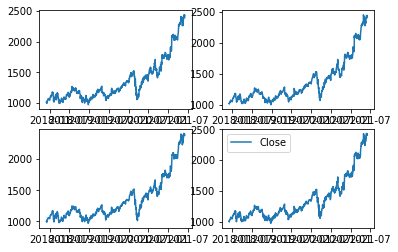

In [8]:
plt.figure(figsize=(10,8))
figure,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(df1_train["Date"],df1_train["Open"],label="Open")
axes[0,1].plot(df1_train["Date"],df1_train["High"],label="High")
axes[1,0].plot(df1_train["Date"],df1_train["Low"],label="Low")
axes[1,1].plot(df1_train["Date"],df1_train["Close"],label="Close")
plt.legend()

# Date -> ds, Open -> y

In [9]:
#prepare the dateset for FBprophet
df1_train.rename(columns={"Open":'y',"Date":'ds'},inplace=True)
df1_train.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y,High,Low,Close
377,2017-12-01,1015.799988,1022.489990,1002.020020,1010.169983
378,2017-12-04,1012.659973,1016.099976,995.570007,998.679993
379,2017-12-05,995.940002,1020.609985,988.280029,1005.150024
380,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005
381,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054


# Build the model

In [10]:
model = Prophet(interval_width=0.9)
model.add_regressor('High',standardize=False)
model.add_regressor('Low',standardize=False)
model.add_regressor('Close', standardize=False)
model.fit(df1_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Autoregressor itself is multivariate in the sense it computes t+1 with its lag version of itself and this is how time series works! now adding results of each different multiple variables like ‘High’, ‘Low’, ‘Close’ we can compute multivariate time series

In [11]:
# To view the model parameters 
model.params

{'beta': array([[ 2.45533151e-03,  1.20760867e-03,  2.04697751e-03,
          3.29714318e-03, -9.85940313e-05,  1.25015097e-03,
         -7.78927567e-04,  1.24494878e-03, -7.76500587e-04,
         -3.65912200e-04, -1.00957783e-03, -1.50327745e-04,
         -4.03351782e-04, -3.41309570e-04, -5.54247850e-04,
         -1.18135684e-03,  8.77423249e-05, -3.28775982e-04,
         -6.11053792e-05, -5.07123909e-04,  1.07217640e-01,
         -8.37764040e-02, -9.12363151e-02, -2.11293084e-02,
          1.52273814e-02,  2.96852107e-02,  4.23253986e-04,
          2.51763278e-04, -2.69121524e-04]]),
 'delta': array([[-0.09299166, -0.07598855, -0.05984106, -0.04621794, -0.03693899,
         -0.02735735, -0.01599459, -0.01841057, -0.00358586, -0.00736728,
         -0.00192268,  0.00053776,  0.00591848,  0.01053368, -0.03086234,
         -0.02903923, -0.02522102, -0.02359958, -0.01251031,  0.00299371,
          0.02039357,  0.03069381,  0.03688516,  0.0425177 ,  0.044198  ]]),
 'k': array([[0.3927839]

In [12]:
#understanding the model fit---------
df1_train_2 = df1_train[["ds","High","Low","Close"]] 
#we will be predicting 'y' i.e."Open"
forecast1_train = model.predict(df1_train_2)
forecast1_train = forecast1_train[['ds','yhat']]
df_model_fit = pd.concat((forecast1_train['yhat'],df1_train.reset_index()),axis=1)

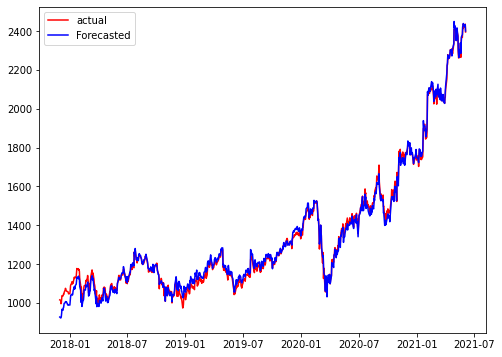

In [13]:
#Visualize it 
plt.figure(figsize=(8,6))
plt.plot(df_model_fit['ds'],df_model_fit['y'],color='red',label='actual')
plt.plot(df_model_fit['ds'],df_model_fit['yhat'],color='blue',label='Forecasted')
plt.legend()

In [18]:
#create an test dataframe
df1_test.rename(columns={"Open":'y',"Date":'ds'},inplace=True)
df1_test.head(5)
df1_test_2 = df1_test[["ds","High","Low","Close"]]                
#we will be predicting 'y'i.e."Open"
df1_test_2
forecast1_test=model.predict(df1_test_2)
forecast1_test = forecast1_test[['ds','yhat']]
df_testdata_fit = pd.concat((forecast1_test['yhat'],df1_test.reset_index()),axis=1).reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


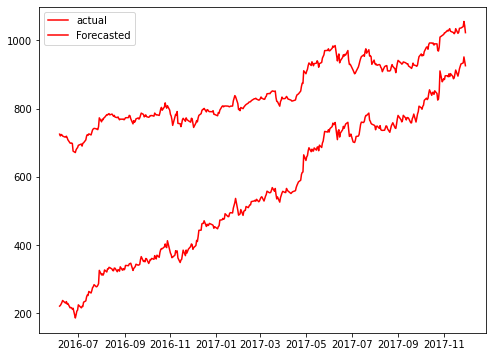

In [19]:
#Visualize it 
plt.figure(figsize=(8,6))
plt.plot(df_testdata_fit['ds'],df_testdata_fit['y'],color='red',label='actual')
plt.plot(df_testdata_fit['ds'],df_testdata_fit['yhat'],color='red',label='Forecasted')
plt.legend()

In [17]:
#make futuredate Approach--------------------
future = model.make_future_dataframe(periods=377)
future.tail()
future_prediction = model.predict(future)

ValueError: ignored